In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read in the original FBI hate crime statistical dataset

In [2]:
df = pd.read_csv("hate_crime.csv")

In [3]:
df

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,NaN,County,AR,Arkansas,West South Central,South,...,White,Not Specified,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226323,1445214,2021,WY0150100,Cody,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Simple Assault,1.0,Residence/Home,Anti-Lesbian (Female),Individual,S,S
226324,1445630,2021,WY0070200,Riverton,NaN,City,WY,Wyoming,Mountain,West,...,Not Specified,Not Specified,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
226325,1448544,2021,WY0190100,Green River,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Government/Public Building,Anti-American Indian or Alaska Native,Individual,S,S
226326,1448545,2021,WY0150000,Park,NaN,County,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Aggravated Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Mental Disability,Individual,S,S


In [4]:
df['data_year'].dtype

dtype('int64')

### Filter hate crimes from 2020

In [5]:
df = df[df['data_year']==2020]
df = df.reset_index(drop=True) 
df

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,864279,2020,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Unknown,2,Arson;Burglary/Breaking & Entering,NaN,Church/Synagogue/Temple/Mosque,Anti-Other Christian,Religious Organization,M,S
1,893434,2020,AK0010200,Fairbanks,NaN,City,AK,Alaska,Pacific,West,...,White,Not Hispanic or Latino,1,Aggravated Assault,1.0,Government/Public Building,Anti-Transgender,Individual,S,S
2,1052479,2020,AK0010300,Juneau,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Unknown,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,Anti-American Indian or Alaska Native,Individual,S,S
3,1054279,2020,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Unknown,1,Sexual Assault With An Object,1.0,Park/Playground,Anti-Female,Individual,S,S
4,1054280,2020,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,American Indian or Alaska Native,Not Hispanic or Latino,1,Aggravated Assault,1.0,Hotel/Motel/Etc.,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9849,1440762,2020,WY0170000,Sheridan,NaN,County,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Simple Assault,1.0,Jail/Prison/Penitentiary/Corrections Facility,Anti-Native Hawaiian or Other Pacific Islander,Individual,S,S
9850,1441769,2020,WY0170100,Sheridan,NaN,City,WY,Wyoming,Mountain,West,...,Not Specified,Not Specified,1,Simple Assault,1.0,Bar/Nightclub,Anti-American Indian or Alaska Native,Individual,S,S
9851,1442136,2020,WY0150100,Cody,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Simple Assault,1.0,Residence/Home,Anti-Female,Individual,S,S
9852,1444656,2020,WY0210100,Evanston,NaN,City,WY,Wyoming,Mountain,West,...,Black or African American,Not Hispanic or Latino,1,Aggravated Assault,1.0,Residence/Home,Anti-White,Individual,S,S


In [6]:
features = []
for col in df.columns:
    features.append(col)

features

['incident_id',
 'data_year',
 'ori',
 'pug_agency_name',
 'pub_agency_unit',
 'agency_type_name',
 'state_abbr',
 'state_name',
 'division_name',
 'region_name',
 'population_group_code',
 'population_group_description',
 'incident_date',
 'adult_victim_count',
 'juvenile_victim_count',
 'total_offender_count',
 'adult_offender_count',
 'juvenile_offender_count',
 'offender_race',
 'offender_ethnicity',
 'victim_count',
 'offense_name',
 'total_individual_victims',
 'location_name',
 'bias_desc',
 'victim_types',
 'multiple_offense',
 'multiple_bias']

In [7]:
df.shape

(9854, 28)

### Filter the anti-Asian hate crimes

In [8]:
df = df[df['bias_desc'].str.contains('Asian')]
df = df.reset_index(drop=True) 
df

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,1437779,2020,AR0660100,Fort Smith,NaN,City,AR,Arkansas,West South Central,South,...,White,Not Hispanic or Latino,1,Destruction/Damage/Vandalism of Property,0.0,Church/Synagogue/Temple/Mosque,Anti-Asian,Business,S,S
1,1253642,2020,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,White,Not Hispanic or Latino,1,Aggravated Assault,1.0,Shelter-Mission/Homeless,Anti-Asian,Individual,S,S
2,1253726,2020,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,Multiple,Hispanic or Latino,4,Intimidation,4.0,Department/Discount Store,Anti-Asian,Individual,S,S
3,1253757,2020,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Other/Unknown,Anti-Asian,Individual,S,S
4,1441612,2020,AZ0071700,Mesa,NaN,City,AZ,Arizona,Mountain,West,...,Not Specified,Not Specified,1,Intimidation,1.0,Restaurant,Anti-Asian,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,1441932,2020,WA0390500,Yakima,NaN,City,WA,Washington,Pacific,West,...,White,Hispanic or Latino,2,Destruction/Damage/Vandalism of Property,1.0,Restaurant,Anti-Asian,Business;Individual,S,S
352,1441972,2020,WASPD0000,Seattle,NaN,City,WA,Washington,Pacific,West,...,Black or African American,Not Hispanic or Latino,1,Simple Assault,1.0,Community Center,Anti-Asian,Individual,S,S
353,1441974,2020,WASPD0000,Seattle,NaN,City,WA,Washington,Pacific,West,...,Unknown,Unknown,1,Intimidation,1.0,Residence/Home,Anti-Asian,Individual,S,S
354,1436997,2020,WI0130100,Madison,NaN,City,WI,Wisconsin,East North Central,Midwest,...,White,Unknown,2,Simple Assault,2.0,Residence/Home,Anti-Asian,Individual,S,S


In [13]:
df.keys()

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias'],
      dtype='object')

In [25]:
df

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
incident_date,,,,,,,,,,,,,,,,,,,,,
2020-04-05,1437779,2020,AR0660100,Fort Smith,NaN,City,AR,Arkansas,West South Central,South,...,White,Not Hispanic or Latino,1,Destruction/Damage/Vandalism of Property,0.0,Church/Synagogue/Temple/Mosque,Anti-Asian,Business,S,S
2020-04-08,1253642,2020,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,White,Not Hispanic or Latino,1,Aggravated Assault,1.0,Shelter-Mission/Homeless,Anti-Asian,Individual,S,S
2020-03-19,1253726,2020,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,Multiple,Hispanic or Latino,4,Intimidation,4.0,Department/Discount Store,Anti-Asian,Individual,S,S
2020-12-01,1253757,2020,AZ0072300,Phoenix,NaN,City,AZ,Arizona,Mountain,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Other/Unknown,Anti-Asian,Individual,S,S
2020-09-08,1441612,2020,AZ0071700,Mesa,NaN,City,AZ,Arizona,Mountain,West,...,Not Specified,Not Specified,1,Intimidation,1.0,Restaurant,Anti-Asian,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-28,1441932,2020,WA0390500,Yakima,NaN,City,WA,Washington,Pacific,West,...,White,Hispanic or Latino,2,Destruction/Damage/Vandalism of Property,1.0,Restaurant,Anti-Asian,Business;Individual,S,S
2020-10-20,1441972,2020,WASPD0000,Seattle,NaN,City,WA,Washington,Pacific,West,...,Black or African American,Not Hispanic or Latino,1,Simple Assault,1.0,Community Center,Anti-Asian,Individual,S,S
2020-11-13,1441974,2020,WASPD0000,Seattle,NaN,City,WA,Washington,Pacific,West,...,Unknown,Unknown,1,Intimidation,1.0,Residence/Home,Anti-Asian,Individual,S,S


In [28]:
df = df.sort_index()
df

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
incident_date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1438195,2020,CO0100300,Empire,NaN,City,CO,Colorado,Mountain,West,...,White,Not Hispanic or Latino,2,Destruction/Damage/Vandalism of Property;Intim...,1.0,Convenience Store,Anti-Asian,Individual,M,S
2020-01-03,1438405,2020,OR0260200,Portland,NaN,City,OR,Oregon,Pacific,West,...,Not Specified,Not Specified,2,Destruction/Damage/Vandalism of Property,1.0,Convenience Store,Anti-Asian,Business;Individual,S,S
2020-01-09,1436600,2020,TN0060100,Cleveland,NaN,City,TN,Tennessee,East South Central,South,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Industrial Site,Anti-Asian,Individual,S,S
2020-01-11,1091754,2020,CA0491100,Department of Parks and Recreation:,Bay Area,Other State Agency,CA,California,Pacific,West,...,Unknown,Unknown,1,Destruction/Damage/Vandalism of Property,NaN,Park/Playground,Anti-Asian,Government,S,S
2020-01-11,1327148,2020,DCMPD0000,Washington,NaN,City,DC,District of Columbia,South Atlantic,South,...,White,Unknown,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Asian,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-19,1304497,2020,NJ0025100,Ridgewood,NaN,City,NJ,New Jersey,Middle Atlantic,Northeast,...,White,Unknown,1,Intimidation,1.0,Other/Unknown,Anti-Asian,Individual,S,S
2020-12-23,1346443,2020,CA0302400,Westminster,NaN,City,CA,California,Pacific,West,...,Unknown,Hispanic or Latino,2,Robbery,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Asian,Individual,S,S
2020-12-24,1262483,2020,CA0430200,Campbell,NaN,City,CA,California,Pacific,West,...,White,Hispanic or Latino,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Asian,Individual,S,S


In [32]:
df.index[0].month

1

In [41]:
jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
for index, row in df.iterrows():
    num = index.month
    if num == 1:
        jan +=1
    elif num == 2:
        feb += 1
    elif num == 3:
        mar += 1
    elif num == 4:
        apr += 1
    elif num == 5:
        may += 1
    elif num == 6:
        jun += 1
    elif num == 7:
        jul += 1
    elif num == 8:
        aug += 1
    elif num == 9:
        sep += 1
    elif num == 10:
        oct += 1
    elif num == 11:
        nov += 1
    else:
        dec += 1  
print(jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec)
print("Total", jan+feb+mar+apr+may+jun+jul+aug+sep+oct+nov+dec)

18 14 55 50 44 39 26 19 29 26 17 19
Total 356


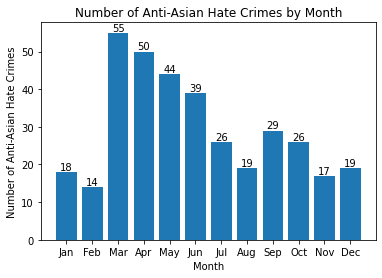

In [47]:
crime_num = [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(months, crime_num)

plt.title('Number of Anti-Asian Hate Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Anti-Asian Hate Crimes')

for i in range(len(crime_num)):
    plt.text(i, crime_num[i], crime_num[i], ha='center', va='bottom')

plt.show()

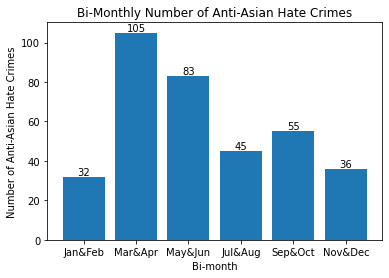

In [46]:
crime_num2 = [jan+feb, mar+apr, may+jun, jul+aug, sep+oct, nov+dec]
bimonths = ['Jan&Feb', 'Mar&Apr', 'May&Jun', 'Jul&Aug', 'Sep&Oct', 'Nov&Dec']
plt.bar(bimonths, crime_num2)

plt.title('Bi-Monthly Number of Anti-Asian Hate Crimes')
plt.xlabel('Bi-month')
plt.ylabel('Number of Anti-Asian Hate Crimes')

for i in range(len(crime_num2)):
    plt.text(i, crime_num2[i], crime_num2[i], ha='center', va='bottom')

plt.show()

### Calculate basic summary statistics


In [49]:
monthly_mean = np.mean(crime_num)
monthly_median = np.median(crime_num)
monthly_mode = pd.Series(crime_num).mode()[0]
monthly_std_dev = np.std(crime_num)
monthly_range_min = np.min(crime_num)
monthly_range_max = np.max(crime_num)

print("Monthly Mean:", monthly_mean)
print("Monthly Median:", monthly_median)
print("Monthly Mode:", monthly_mode)
print("Monthly Standard Deviation:", monthly_std_dev)
print("Monthly Range (min, max):", (monthly_range_min, monthly_range_max))

Monthly Mean: 29.666666666666668
Monthly Median: 26.0
Monthly Mode: 19
Monthly Standard Deviation: 13.368703086770317
Monthly Range (min, max): (14, 55)


In [48]:
df_monthly = df.resample('M').sum()
rolling_avg = df_monthly.rolling(window=3).mean()
print(rolling_avg)


                incident_id      data_year  adult_victim_count  \
incident_date                                                    
2020-01-31              NaN            NaN                 NaN   
2020-02-29              NaN            NaN                 NaN   
2020-03-31     3.411767e+07   58580.000000           25.333333   
2020-04-30     4.618191e+07   80126.666667           37.333333   
2020-05-31     5.914550e+07  100326.666667           47.333333   
2020-06-30     5.372710e+07   89553.333333           43.000000   
2020-07-31     4.547663e+07   73393.333333           34.333333   
2020-08-31     3.513431e+07   56560.000000           27.666667   
2020-09-30     3.192197e+07   49826.666667           26.666667   
2020-10-31     3.251004e+07   49826.666667           26.000000   
2020-11-30     3.225127e+07   48480.000000           29.000000   
2020-12-31     2.778926e+07   41746.666667           22.666667   

               juvenile_victim_count  total_offender_count  \
incident_date

### Conduct some basic time series analysis

<b>Rolling mean:</b> aka moving average, a method of smoothing out fluctuations in a time series by calculating the average of a sliding window of observations over time. By taking the mean of a window of observations, it can help to reduce the effect of random noise and highlight underlying trends or changes in the data. Rolling means are useful for identifying short-term changes in the data

<b>Trend analysis:</b> a method of decomposing a time series into its underlying trend, cycle, and random components. It aims to identify the long-term direction or tendency of the data, ignoring the short-term fluctuations and noise.


In [51]:
import statsmodels.api as sm

# Convert the list to a Pandas DataFrame with a DatetimeIndex
dates = pd.date_range(start='2020-01-01', end='2020-12-01', freq='MS')
df = pd.DataFrame({'hate_crimes': crime_num}, index=dates)

# Calculate a rolling mean with a window size of 3
rolling_mean = df['hate_crimes'].rolling(window=3).mean()

# Perform a trend analysis using a Hodrick-Prescott filter
cycle, trend = sm.tsa.filters.hpfilter(df['hate_crimes'], lamb=1600)

print("Rolling Mean:\n", rolling_mean)
print("\nTrend Analysis:\n", trend)

Rolling Mean:
 2020-01-01          NaN
2020-02-01          NaN
2020-03-01    29.000000
2020-04-01    39.666667
2020-05-01    49.666667
2020-06-01    44.333333
2020-07-01    36.333333
2020-08-01    28.000000
2020-09-01    24.666667
2020-10-01    24.666667
2020-11-01    24.000000
2020-12-01    20.666667
Freq: MS, Name: hate_crimes, dtype: float64

Trend Analysis:
 2020-01-01    36.246475
2020-02-01    35.155348
2020-03-01    34.052817
2020-04-01    32.914256
2020-05-01    31.728130
2020-06-01    30.493585
2020-07-01    29.217434
2020-08-01    27.911808
2020-09-01    26.586828
2020-10-01    25.247043
2020-11-01    23.898512
2020-12-01    22.547764
Freq: MS, Name: hate_crimes_trend, dtype: float64


<i><b>Rolling Means:</b></i>

From the rolling means, we can see that the average number of hate crimes per month increased from March to May (29 to 49.67), indicating a potential spike in hate crimes during that period. However, the rolling mean decreased from May to June (49.67 to 44.33), suggesting that the number of hate crimes may have decreased in June. The rolling mean then decreased further from June to July (44.33 to 36.33) and continued to decrease gradually until December (20.67), indicating a general downward trend in the number of hate crimes.

<i><b>Trend Analysis:</b></i>

The trend analysis shows that the number of hate crimes per month decreased from January (36.25) to December (22.55), suggesting a general downward trend in the number of hate crimes throughout the year. The negative trend value (-1.69) indicates that the time series data is decreasing over time.